In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
# Load dataset 
df = pd.read_csv('Datasets/StudentsPerformance.csv')
print("First 5 rows:")
print(df.head())

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
#1a)  Simulate missing values: randomly assign NaN to few of the rows in 'math score'. Replace the missing 'math score' values with the mean
df.loc[df.sample(frac=0.05, random_state=42).index, 'math score'] = np.nan
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     50
reading score                   0
writing score                   0
dtype: int64

In [4]:
print("\nMissing values before handling:")
print(df.isnull().sum())

mean_math = df['math score'].mean()
df['math score'].fillna(mean_math, inplace=True)

# Confirm missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     50
reading score                   0
writing score                   0
dtype: int64

Missing values after handling:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


C:\Users\mayuri.bhandari\AppData\Local\Temp\ipykernel_17772\2976014638.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(mean_math, inplace=True)


In [5]:
#1b) Apply Label Encoding to the 'gender' and 'lunch' columns 
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # 0=female, 1=male
df['lunch'] = le.fit_transform(df['lunch'])    # depends on label mapping
print(df.head())

   gender race/ethnicity parental level of education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

  test preparation course  math score  reading score  writing score  
0                    none        72.0             72             74  
1               completed        69.0             90             88  
2                    none        90.0             95             93  
3                    none        47.0             57             44  
4                    none        76.0             78             75  


In [6]:
print("\nShape before encoding:", df.shape)


Shape before encoding: (1000, 8)


In [8]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [9]:
df = pd.get_dummies(df, columns=['test preparation course'])

In [10]:
print("Shape after encoding:", df.shape)

Shape after encoding: (1000, 9)


In [7]:
#1d) Normalize the 'math score', 'reading score', and 'writing score' using Min-Max Scaling
scaler = MinMaxScaler()

# Columns to scale
score_columns = ['math score', 'reading score', 'writing score']
df[score_columns] = scaler.fit_transform(df[score_columns])

print("\nFirst 5 rows after normalization:")
print(df[score_columns].head())



First 5 rows after normalization:
   math score  reading score  writing score
0    0.695652       0.662651       0.711111
1    0.663043       0.879518       0.866667
2    0.891304       0.939759       0.922222
3    0.423913       0.481928       0.377778
4    0.739130       0.734940       0.722222


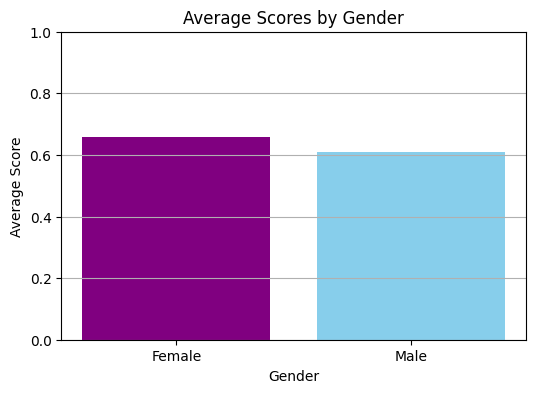

In [8]:
#1e) Plot a bar chart showing average scores by gender

# Create 'average score' column
df['average score'] = df[score_columns].mean(axis=1)

# Group by gender and calculate average scores
avg_scores_by_gender = df.groupby('gender')['average score'].mean()

# Plotting
gender_labels = ['Female', 'Male']  # 0=female, 1=male after encoding
plt.figure(figsize=(6, 4))
plt.bar(gender_labels, avg_scores_by_gender, color=['purple', 'skyblue'])
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.ylim(0, 1)  # Because scores are normalized
plt.grid(axis='y')
plt.show()


In [ ]:
Additional Questions

In [11]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
print(f"Number of outliers in 'math score': {outliers.shape[0]}")

Number of outliers in 'math score': 0


In [10]:
df['math score'] = df['math score'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

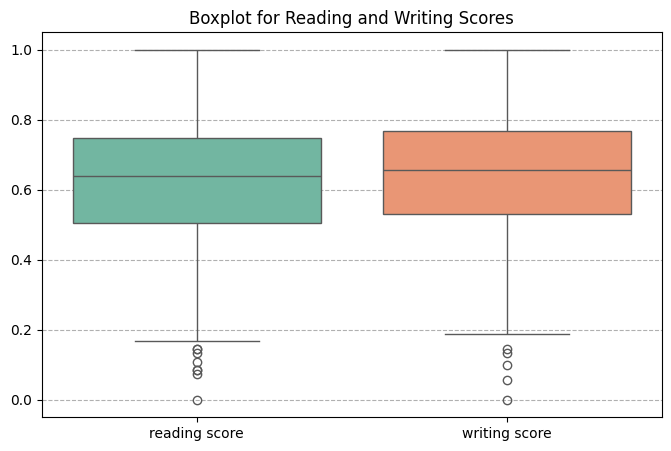

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['reading score', 'writing score']], palette='Set2')
plt.title('Boxplot for Reading and Writing Scores')
plt.grid(axis='y', linestyle='--')
plt.show()


In [4]:
##1. Box (middle 50%)
# The box spans from Q1 (25th percentile) to Q3 (75th percentile).
# This range is called the Interquartile Range (IQR) = Q3 − Q1.
# It shows where the central 50% of the data lies.

## 2. Median (Q2)
# The horizontal line inside the box is the median (50th percentile).
# It splits the data into two halves.
# If it's closer to the bottom, the data is right-skewed; if closer to the top, it’s left-skewed.

##3. Whiskers
# Extend from the box to show the range of data not considered outliers.
# Typically go up to: Lower whisker: smallest value within Q1 − 1.5×IQR
# Upper whisker: largest value within Q3 + 1.5×IQR

# 4. Outliers
# Points beyond 1.5×IQR from Q1 or Q3.
# These are plotted individually.
# They indicate unusual values that may need further attention.


In [24]:
df['pass_fail'] = df['average score'].apply(lambda x: 'Pass' if x >= 0.40 else 'Fail')

In [31]:
df['pass_fail'].unique()

array(['Pass', 'Fail'], dtype=object)

In [32]:
X = df.drop(columns=['pass_fail'])
y = df['pass_fail']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
numeric_cols = ['math score', 'reading score', 'writing score', 'average score']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [34]:
X_train

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,test preparation course_completed,test preparation course_none,average score,average_score
29,0,group D,master's degree,1,0.449275,0.605263,0.705882,False,True,0.620287,0.649244
535,0,group C,bachelor's degree,0,0.507246,0.776316,0.800000,True,False,0.724571,0.745576
695,0,group D,some college,0,0.695652,0.855263,0.835294,False,True,0.813675,0.827884
557,1,group C,master's degree,0,0.434783,0.565789,0.600000,False,True,0.567237,0.600240
836,1,group E,high school,1,0.608696,0.526316,0.494118,False,True,0.565176,0.598336
...,...,...,...,...,...,...,...,...,...,...,...
106,0,group D,master's degree,1,0.811594,1.000000,1.000000,False,True,0.949010,0.952899
270,1,group C,bachelor's degree,1,0.550725,0.513158,0.541176,False,True,0.561177,0.594642
860,0,group C,associate's degree,1,0.318841,0.500000,0.447059,False,True,0.461997,0.503026
435,1,group C,some college,0,0.275362,0.315789,0.447059,True,False,0.389364,0.435931


In [35]:
X_test

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,test preparation course_completed,test preparation course_none,average score,average_score
521,0,group C,associate's degree,1,0.511137,0.815789,0.811765,False,True,0.742676,0.762300
737,0,group B,some college,0,0.511137,0.552632,0.682353,True,False,0.611620,0.641238
740,1,group D,bachelor's degree,1,0.511137,0.644737,0.670588,False,True,0.638044,0.665647
660,1,group C,some college,0,0.511137,0.697368,0.682353,False,True,0.659444,0.685415
411,1,group E,some college,1,0.511137,0.776316,0.741176,True,False,0.705577,0.728030
...,...,...,...,...,...,...,...,...,...,...,...
408,0,group D,high school,0,0.304348,0.434211,0.482353,True,False,0.448365,0.490433
332,1,group E,associate's degree,1,0.449275,0.421053,0.447059,True,False,0.471212,0.511538
208,0,group B,some college,0,0.623188,0.750000,0.717647,False,True,0.719188,0.740603
613,0,group C,associate's degree,1,0.492754,0.697368,0.694118,False,True,0.658478,0.684523


In [36]:
y_train

29     Pass
535    Pass
695    Pass
557    Pass
836    Pass
       ... 
106    Pass
270    Pass
860    Pass
435    Pass
102    Pass
Name: pass_fail, Length: 800, dtype: object

In [ ]:
df.to_csv("students_processed.csv", index=False)

In [ ]:
df_loaded = pd.read_csv("students_processed.csv")
print(df_loaded.shape)
print(df_loaded.columns)